<a href="https://colab.research.google.com/github/SeoYoung346/2025.LLM/blob/main/_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 소프트웨어학과 202221592 김서영

In [28]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

In [29]:
mnist_train = dset.MNIST("./data/MNIST", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = dset.MNIST("./data/MNIST", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

In [30]:
batch_size = 100
train_loader = torch.utils.data.DataLoader(mnist_train,
batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_test,
batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)

In [31]:
class Encoder(nn.Module):
 def __init__(self):
  super(Encoder,self).__init__()
  self.layer1 = nn.Sequential(
   nn.Conv2d(1,16,3,padding=1),   # 16 x 28 x 28
   nn.ReLU(),
   nn.BatchNorm2d(16),
   nn.Conv2d(16,32,3,padding=1),  # 32 x 28 x 28
   nn.ReLU(),
   nn.BatchNorm2d(32),
   nn.Conv2d(32,64,3,padding=1),  # 64 x 28 x 28
   nn.ReLU(),
   nn.BatchNorm2d(64),
   nn.MaxPool2d(2,2)              # 64 x 14 x 14
  )
  self.layer2 = nn.Sequential(
   nn.Conv2d(64,128,3,padding=1),  # 128 x 14 x 14
   nn.ReLU(),
   nn.BatchNorm2d(128),
   nn.MaxPool2d(2,2),
   nn.Conv2d(128,256,3,padding=1),  # 256 x 7 x 7
   nn.ReLU()
 )
 def forward(self,x):
  out = self.layer1(x)
  out = self.layer2(out)
  out = out.view(batch_size, -1)
  return out


class Decoder(nn.Module):
 def __init__(self):
  super(Decoder,self).__init__()
  self.layer1 = nn.Sequential(
   nn.ConvTranspose2d(256,128,3,2,1,1), # 128 x 14 x 14
   nn.ReLU(),
   nn.BatchNorm2d(128),
   nn.ConvTranspose2d(128,64,3,1,1), # 64 x 14 x 14
   nn.ReLU(),
   nn.BatchNorm2d(64)
  )
  self.layer2 = nn.Sequential(
   nn.ConvTranspose2d(64,16,3,1,1), # 16 x 14 x 14
   nn.ReLU(),
   nn.BatchNorm2d(16),
   nn.ConvTranspose2d(16,1,3,2,1,1), # 1 x 28 x 28
   nn.ReLU()
  )
 def forward(self,x):
  out = x.view(batch_size,256,7,7)
  out = self.layer1(out)
  out = self.layer2(out)
  return out

In [32]:
num_epoch = 10
Learning_rate = 0.0002
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
encoder = Encoder().to(device)
decoder = Decoder().to(device)
parameters = itertools.chain(encoder.parameters(), decoder.parameters())
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(parameters, lr=Learning_rate)

In [33]:
for i in range(1):
 for j,[image, label] in enumerate(test_loader):
  image = image.to(device)
  z = encoder(image)
  output = decoder(z)
  loss = loss_func(output,image)

 # if j % 10 == 0:
 # print(loss)
print("loss is", loss.cpu().item())

loss is 0.8422526717185974


torch.Size([100, 28, 28])


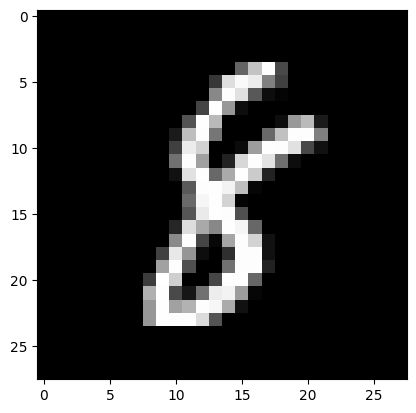

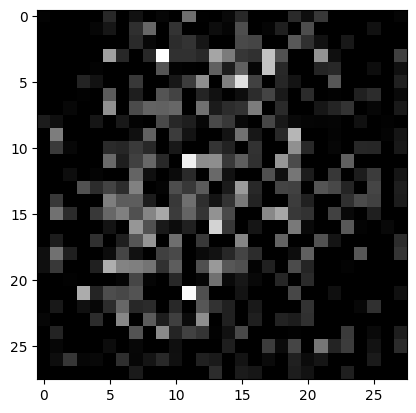

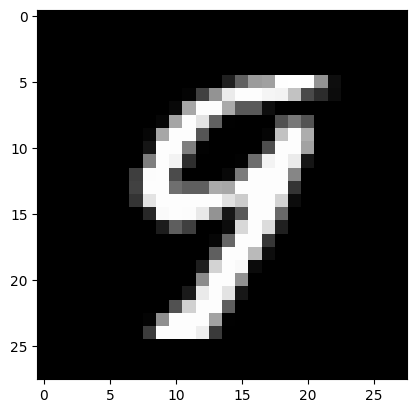

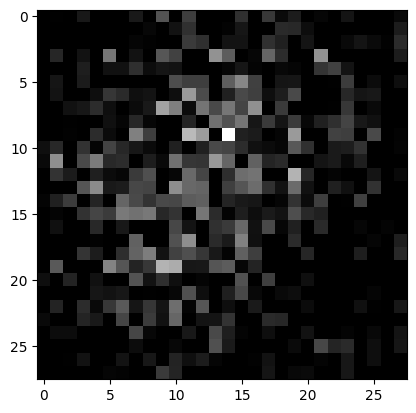

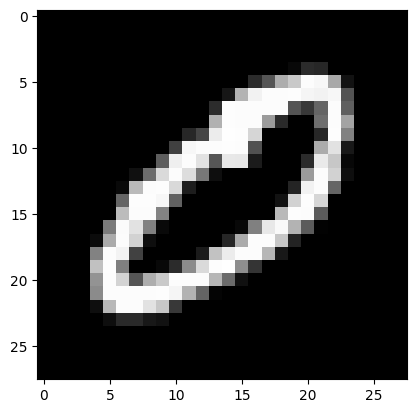

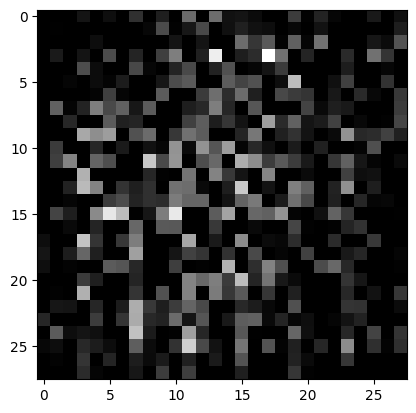

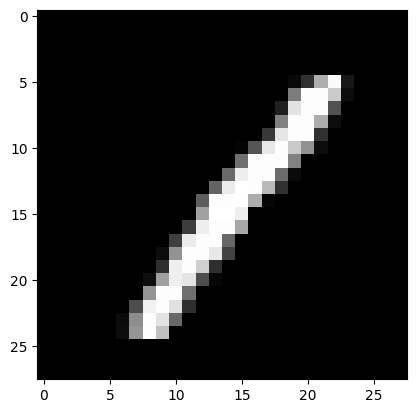

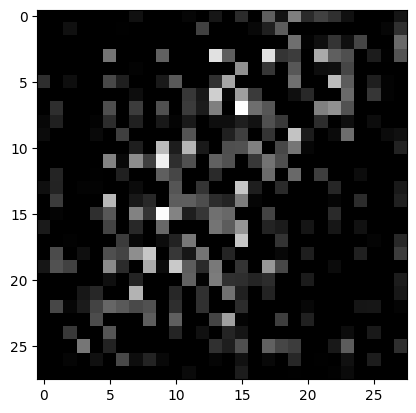

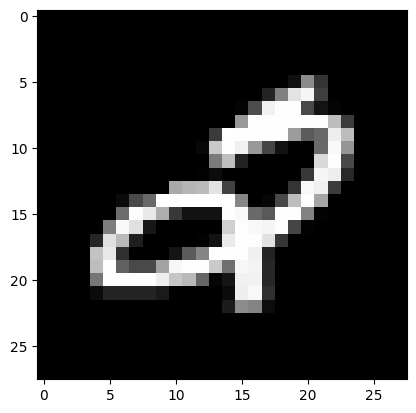

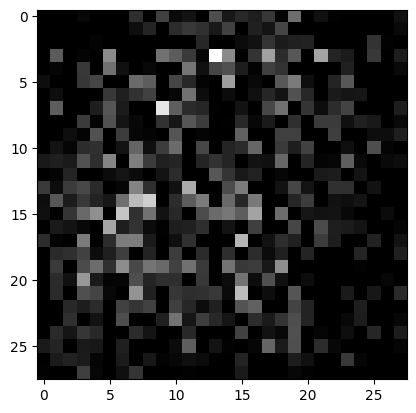

In [35]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())
for i in range(5):
 plt.imshow(torch.squeeze(image[i].cpu()).data.numpy(),cmap='gray')
 plt.show()
 plt.imshow(out_img[i].numpy(),cmap='gray')
 plt.show()

In [36]:
for i in range(num_epoch):
 for j,[image, label] in enumerate(train_loader):
  optimizer.zero_grad()
  image = image.to(device)
  z = encoder(image)
  output = decoder(z)
  loss = loss_func(output, image)
  loss.backward()
  optimizer.step()
 print("loss is", loss.cpu().item())

loss is 0.005931769497692585
loss is 0.0032573407515883446
loss is 0.0025529551785439253
loss is 0.0020067791920155287
loss is 0.0016647152369841933
loss is 0.001434896606951952
loss is 0.0015466524055227637
loss is 0.0011102831922471523
loss is 0.0009794336510822177
loss is 0.0008874692721292377


torch.Size([100, 28, 28])


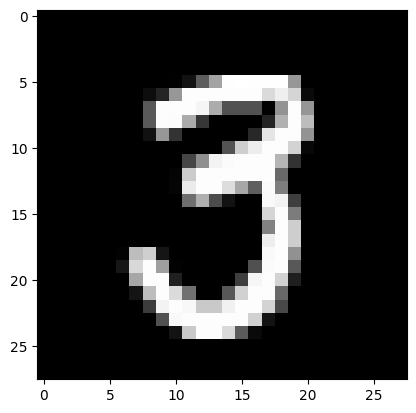

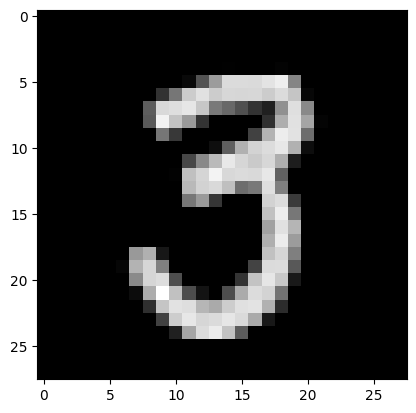

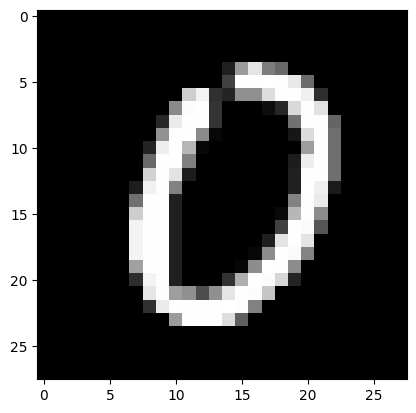

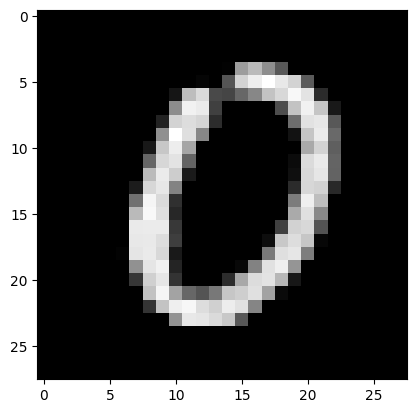

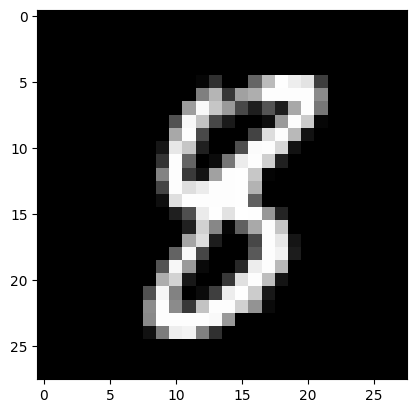

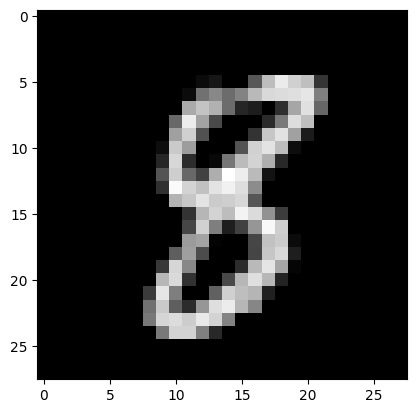

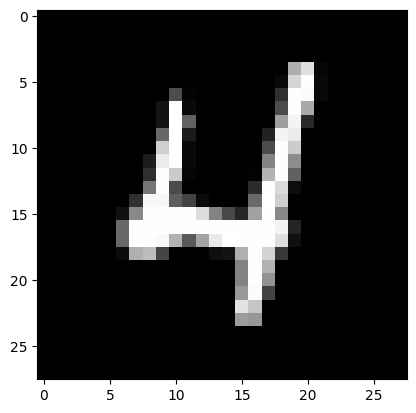

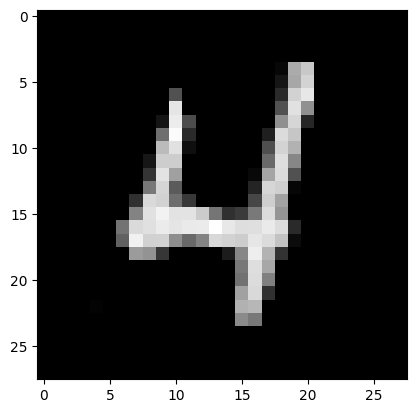

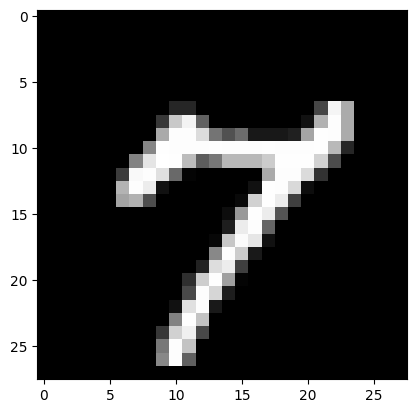

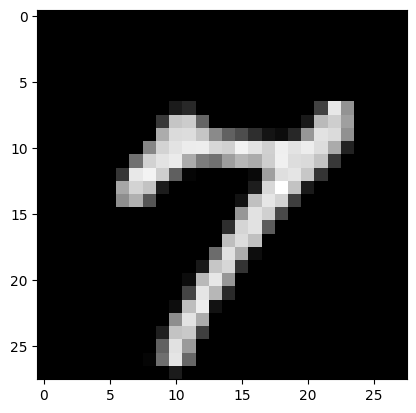

In [37]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())
for i in range(5):
 plt.imshow(torch.squeeze(image[i].cpu()).data.numpy(),cmap='gray')
 plt.show()
 plt.imshow(out_img[i].numpy(),cmap='gray')
 plt.show()